In [1]:
import tensorflow as tf

In [4]:
from tensorflow import keras 

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [6]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


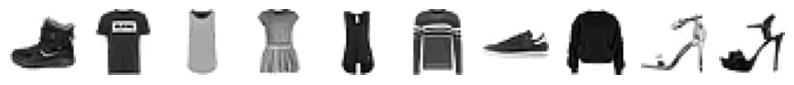

In [8]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

# subplots : 여러 그래프를 그릴 때 사용
# fig: figure, 전체 subplot
# axs는 axes : 전체 중 하나하나를 말한다. 서브플롯 안에 2개의 그래프가 있다면 그 두개의 그래프를 말한다.
# (1,10) : 1X10의 배열( 1개의 행과 10개의 열)
# figsize=(10,10) 그림 기기
# imshow() 함수 : 넘파이 배열로 저장된 이미지를 그릴 수 있다. cmap : colormap 설정
# axis() 함수 : 그래프의 선과 x축, y축 값 제거 

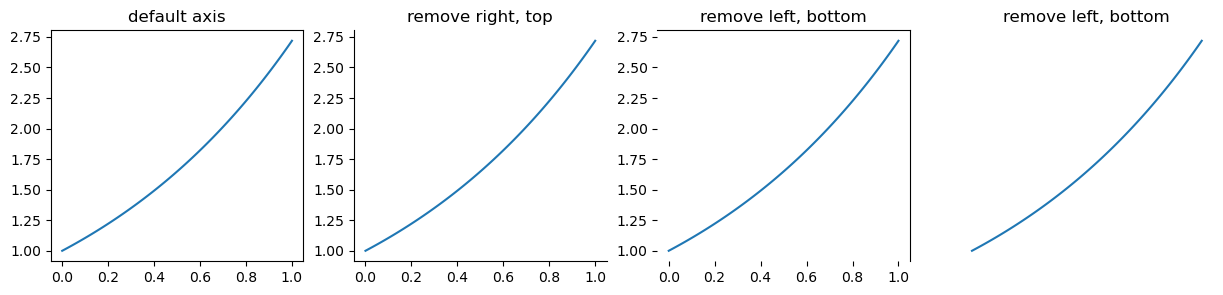

In [12]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 1, 100)

f, axes = plt.subplots(1, 4, figsize=(15, 3))
axes[0].plot(x, np.exp(x))
axes[0].set_title("default axis")

axes[1].plot(x, np.exp(x))
axes[1].set_title("remove right, top")
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)

axes[2].plot(x, np.exp(x))
axes[2].set_title("remove left, bottom")
axes[2].spines['left'].set_visible(False)
axes[2].spines['bottom'].set_visible(False)

axes[3].plot(x, np.exp(x))
axes[3].set_title("remove left, bottom")
axes[3].axis('off')
plt.show()

In [13]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [14]:
import numpy as np

print(np.unique(train_target, return_counts=True))
# unique() : 배열에서 중복된 값 제거, 중복되지 않은 값들로 이루어진 새로운 배열 반환
# return_counts=True : 중복되지 않은 값들이 각각 몇 번씩 등장하는지의 빈도를 함께 반환

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


### 확률적 경사 하강법
- 훈련 샘플이 많기 때문에 전체 데이터를 한꺼번에 사용하여 모델을 훈련하는 것보다 샘플을 하나씩 꺼내서 모델을 훈련하는 방식이 더 효율적이다.
- **확률적 경사 하강법**
- 전처리
  - 특성마다 값의 범위가 다르면 올바르게 손실 함수의 경사를 내려올 수 없다.
  - 255로 나누어서 패션 MNIST의 각 픽셀을 0~1 사이의 값으로 정규화한다.
  - reshape() 메서드로 2차원 배열을 1차원 배열로 펼친다.
  - reshape() 메서드의 두 번째 매개변수 28*28 이미지 크기에 맞게 지정하면 첫 번째 차원은 변하지 않고 원본 데이터의 2,3번째 차원이 1차원으로 합쳐진다. 

In [15]:
train_scaled = train_input /255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [16]:
print(train_scaled.shape)

(60000, 784)


**교차 검증(Cross Validation)**<br>
- 모델을 반복 학습함으로써 모델의 신뢰도를 높일 수 있다.
- 분리한 데이터를 교차하여 모델을 검증한다.
- train_test_split() 함수는 데이터를 1회 분리해 모델을 학습하고 검증하지만
- 교차 검증은 여러 번 분리해 같은 데이터로 여러 번 훈련한다.
- n_jobs : 병렬처리 시 사용할 CPU 수; 여기서는 사용하지 않음.
- SGDClassifier 클래스와 cross_validate 함수를 사용
- max_iter : 반복 횟수

In [17]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8192833333333333


## 인공 신경망: artificial neural network
- 매컬러-피츠 뉴런; 워런 매컬러와 윌터 피츠가 제안한 뉴런 모델
- 생물학적 뉴런
    - 수상 돌기로부터 신호를 받아 세포체에 모은다.
    - 신호가 어떤 임곗값에 도달하면 축삭 돌기를 통하여 다른 세포에 신호를 전달한다.
- 가장 기본적인 인공 신경망은 확률적 경사 하강법을 사용하는 로지스틱 회귀와 같다.
- 유닛, 뉴런 : 인공 신경망에서 z 값을 계산하는 단위
- sklearn으로 만든 확률적 경사 하강법을 사용하는 로지스틱 회귀는 성능이 좋지 않았다. > 다른 라이브러리 사용 

In [18]:
import tensorflow as tf

### 케라스 
- 프랑스와 숄레가 만든 딥러닝 라이브러리
- 텐서플로의 고수준 API
- 텐서플로에서 케라스를 사용할 수 있는지 확인

### 인공 신경망으로 모델 만들기
- 인공 신경망에서는 교차 검증을 잘 사용하지 않고 검증 세트를 별도로 덜어내어 사용
  1. 딥러닝 분야의 데이터셋은 충분히 커서 검증 점수가 안정적이다.
  2. 교차 검증을 수행하는데 시간이 너무 오래걸린다. 

In [19]:
from tensorflow import keras

In [20]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [21]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [22]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [32]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

# 밀집층 만들기
# 뉴런의 개수 = 10
# 뉴런의 출력에 적용할 함수 = softmax
# 입력의 크기 = input_shape(784,) : 10개의 뉴런이 각각 784개의 픽셀값을 받는다.

C:\Users\82104\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model = keras.Sequential([dense])
# 밀집층을 가진 신경만 만기기

In [34]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# 설정 단계
# model 객체의 compile() 메서드에서 수행함 / 손실 함수의 종류를 지정해야 한다.

**kears의 손실 함수**<br>
- 이진 분류 : binary_crossentropy
- 다중 분류 : categorical_crossentropy

출력층은 10개의 뉴런이 있고 10개의 클래스에 대한 확률을 출력
- 첫 번째 뉴런은 티셔츠
- 두 번째 뉴련은 바지일 확률
- target에 해당하는 확률만 남겨 놓기 위해서 나머지 확률에는 모두 0을 곱한다.
- **one-hot encoding(원-핫 인코딩)**
    - target 값을 해당 클래스만 1이고 나머지는 모두 0인 배열로 만드는 것
    - ex: sampel=티셔츠
        - 첫 번째 뉴런의 활성화 함수 출력인 a1에 크로스 엔트로피 손실 함수 적용
        - 나머지 활성화 함수 출력 a2~a10까지는 모두 0으로 만든다.
        - 신경망은 티셔츠 샘플에서 손실을 낮추려면 첫 번째 뉴런 활성화 출력 a1의 값을 가능한 1에 가깝도록 만들어야 한다.

In [35]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


정수로 된 target 값을 원-핫 인코딩을 바꾼다.
- compile() 메서드에 손실 함수를 loss='categorical_crossentropy'로 지정

텐서플로에서는 정수로 된 target 값을 one-hot encoding으로 바꾸지 않고도 그냥 사용할 수 있다.
- compile() 메서드에 손실 함수를 loss='sparse_categorical_crossentropy'로 지정
- 정수로 된 target 값을 사용해 크로스 엔트로피 손실을 계산해준다.

metrics=["accuracy"]
- keras는 모델이 훈련할 때 기본으로 epoch마다 손실 값을 출력해준다.
- 손실이 줄어드는 것을 보고 훈련이 잘 되고 있는 것을 알 수 있다.
- 정확도까지 함께 출력해 주기 위해 지정

In [36]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7251 - loss: 0.8201
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8385 - loss: 0.4808
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8456 - loss: 0.4473
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8548 - loss: 0.4183
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8581 - loss: 0.4129


In [37]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8399 - loss: 0.4428


[0.44357314705848694, 0.8418333530426025]

# 12장 심층 신경망
---
인공 신경망은 층을 많이 추가할 수 있다.<br>
층을 추가하여 성능을 향상시킬 수 있다.<br>

In [38]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

## 데이터 변환
- 이미지의 픽셀값을 0~255 범위에서 0~1 사이로 변환
- 28*28 크기의 2차원 배열을 784 크기의 1차원 배열로 펼친다.

In [39]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

## 2개의 층 추가
- 입력층과 출력층 사이에 밀집층 추가
- 은닉층(hidden layer)
    - 입력층과 출력층 사이에 있는 모든 층
    - 은닉층에는 활성화 함수가 있다.
- 활성화 함수
    - 신경망 층의 선형 방정식의 계산 값에 적용하는 함수
    - 분류문제를 위한 신경망 : 이진 분류일 경우 시그모이드 함수, 다중 분류일 경우 소프트맥스 함수를 사용
    - 은닉층 : 시그모이드 함수와 렐루(RELU) 함수 등을 사용

- **은닉층의 활성화 함수가 필요한 이유**
    - 은닉층에서 선형적인 산술 계산만 수행한다면 수행 역할이 없다.
    - 선형 계산을 활성화 함수를 이용하여 적당하게 만들어줘야 다음층의 계산과 단순히 합쳐지지 않고 나름의 역할을 할 수 있다.
- 시그모이드 함수 : 뉴런의 출력 z 값을 0과 1 사이로 압축한다.

**인공 신경망의 강력한 성능은 층을 추가하여 입력 데이터에 대해 연속적인 학습을 진행하는 능력에 있다.**

In [40]:
dense1 = keras.layers.Dense(100, activation='sigmoid',
                            input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')
# sigmoid 함수를 사용한 은닉층 / softmax 함수를 사용한 출력층을 케라스의 Dense 클래스로 만든다. 
# 케라스에서 신경망의 첫 번째 층은 input_shape 매개변수로 입력의 크기를 반드시 지정해줘야 한다.

In [43]:
model = keras.Sequential([dense1, dense2])
# dense1, dense2를 리스트의 형태로 Sequential 클래스의 객체에 전달하여 심층 신경망(deep neural network)를 만든다. 
# 순서대로 나열해야 한다. 

In [44]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Dense 층의 출력의 크기 (샘플의 개수, 출력 개수)<br>
- (None, 100)
- None : 샘플의 개수가 아직 정의되지 않음.
- 케라스 모델의 fit() 메서드에 훈련 데이터를 주입하면 이 데이터를 한 번에 모두 사용하지 않고 잘게 나누어 여러 번에 걸쳐 경사 하강법 단계를 수행한다. = **미니배치 경사 하강법**
- 100 : 은닉층의 뉴런 개수가 100개이기 때문에 100개의 출력이 나온다.
- 샘플마다 784개의 픽셀값이 은닉층을 통과하면서 100개의 특성으로 압축된다.

Dense 층의 모델 파라미터 개수 
- 입력 픽셀 784개와 100개의 모든 조합에 대한 가중치가 있고 뉴런마다 1개의 절편이 있다.
- 784 X 100 + 1 X 100 = 78500

총 모델 파라미터 개수 : 79510
- 은닉층과 출력층의 파라미터 개수를 합한 값
훈련되는 파라미터 개수 : 79510
- 은닉층과 출력층의 파라미터 개수를 합한 값
훈련되지 않는 파라미터의 개수 : 0
- 경사 하강법으로 훈련되지 않는 파라미터를 가진 층이 있을 경우 해당되는 파라미터의 개수가 출력된다.


---
### 층을 추가하는 다른 방법
- Sequential 클래스에 층을 추가하는 다른 방법
- 앞에서는 Dense 클래스의 객체 dense1, dense2를 만들어 Sequential 클래스에 전달
- 두 번째 방법 : 두 객체 dense1, dense2를 따로 저장하여 쓸 일이 없기 때문에 Sequential 클래스의 생성자 안에서 Dense 클래스의 객체를 만드는 방법
- 생성자 안에서 바로 객체 생성
    - 추가되는 층을 한눈에 쉽게 알아볼 수 있다.
    - Sequential 클래스의 name 매개변수로 모델의 이름 저장
    - Dense 층의 name 매개변수에 층의 이름을 'hidden'과 'output'으로 지정

**모델의 이름은 상관없지만 층의 이름은 반드시 영문이어야 한다.**

In [45]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')],
                         name='패션 MNIST 모델')

In [46]:
model.summary()

Model: "패션 MNIST 모델"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden (Dense)                       │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model = keras.Sequential()
model.add(keras.layers.Dense(100,
                             activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [49]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7591 - loss: 0.7640
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8530 - loss: 0.4109
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8700 - loss: 0.3610
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8800 - loss: 0.3327
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8856 - loss: 0.3172


### 렐루 함수 : RELU 
- 시그모이드 함수 : 초기 인공 신경망의 은닉층에 많이 사용된 활성화 함수
- **오른쪽과 왼쪽 끝으로 갈수록 그래프가 누워있어서 올바른 출력을 만드는데 신속하게 대응하지 못한다.**
    - 시그모이드 함수는 층이 많은 신층 신경망일수록 그 효과가 누적되어 학습을 더 어렵게 만든다. 따라서 개선하기 위해서 다른 활성화 함수가 필요
- 입력이 양수일 경우에는 활성화 함수가 없는 것처럼 그냥 입력을 통과시킨다.
- 입력이 음수일 경우에는 0으로 만든다.
- 심층 신경망에서 뛰어나다. 